In [122]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [104]:
# company_nameに2つの株の銘柄名を入れて回せばOK
# 7203.T = トヨタ
# 9020.T = JR東日本
company_name = ['7203.T','9020.T']
df = pd.DataFrame()

for name in company_name:
    adj_data = wb.DataReader(name, 'yahoo',start="2009-1-1")['Adj Close']
    df[name] = adj_data

In [1]:
print("7203" + ".T")

7203.T


In [160]:
a = wb.DataReader('1301.T','yahoo')
a

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-08,4020.0,3885.0,3885.0,3995.0,79900.0,3568.692627
2017-12-11,4050.0,3945.0,4020.0,3975.0,28300.0,3550.826904
2017-12-12,4025.0,3950.0,3975.0,4010.0,46900.0,3582.092041
2017-12-13,4020.0,3945.0,4020.0,3970.0,37300.0,3546.360107
2017-12-14,3990.0,3950.0,3960.0,3985.0,33400.0,3559.759521
...,...,...,...,...,...,...
2022-12-01,3720.0,3675.0,3710.0,3695.0,19700.0,3695.000000
2022-12-02,3715.0,3605.0,3715.0,3645.0,20100.0,3645.000000
2022-12-05,3640.0,3610.0,3640.0,3640.0,14300.0,3640.000000


<AxesSubplot:xlabel='Date'>

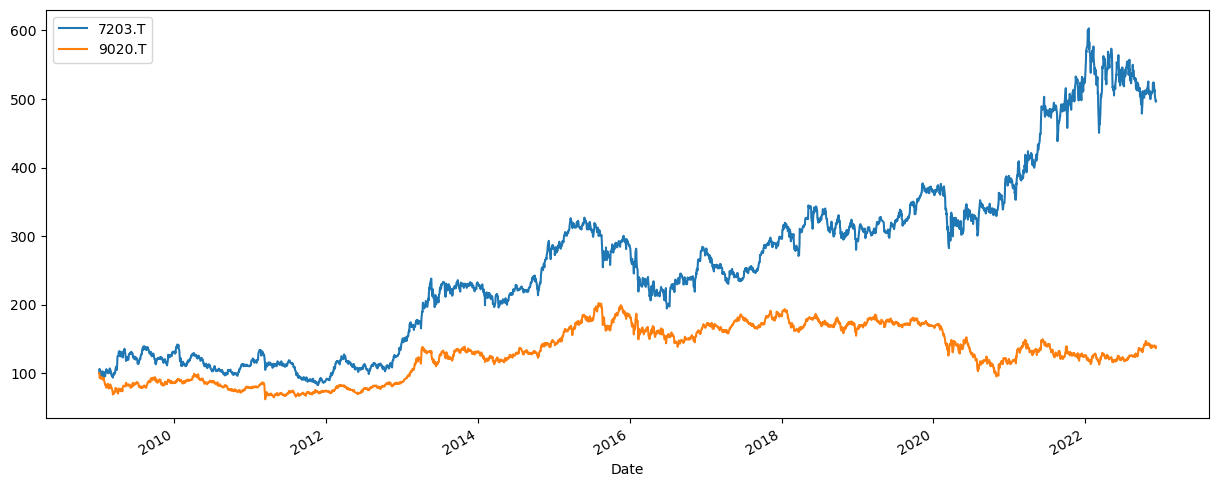

In [105]:
# 必要な情報をまとめる・尺度を同じにして図にプロットする
(df/ df.iloc[0] * 100).plot(figsize=(15,6))

In [106]:
log_returns = np.log(df / df.shift(1))
log_returns.head(5)

,7203.T,9020.T
Date,,
2009-01-05,NaN,NaN
2009-01-06,0.013201,-0.005739
2009-01-07,0.048009,-0.048647
2009-01-08,-0.018928,-0.015221
2009-01-09,-0.022546,0.012195


In [107]:
sec_returns = log_returns.mean() * 250
sec_returns

7203.T    0.117115
9020.T    0.023995
dtype: float64

In [108]:
sec_std = log_returns.std() * 250
sec_std

7203.T    4.165336
9020.T    4.011039
dtype: float64

In [109]:
log_returns.cov() * 250

,7203.T,9020.T
7203.T,0.069400,0.029378
9020.T,0.029378,0.064354


In [110]:
log_returns.corr()

,7203.T,9020.T
7203.T,1.000000,0.439594
9020.T,0.439594,1.000000


In [111]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000): # 1000買い繰り返し
    weights = np.random.random(len(company_name)) # 2つの数値、0~1の間の乱数を発生させる
    weights /= np.sum(weights) # 全体を0~1の間でスケール調整する
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250) # ポートフォリオの予想利益率
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))) # ポートフォリオの標準偏差

# 行列化する
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities # 適当な割合を1000回作成して、1000回分の計算結果をそれぞれのリストに格納した。

(array([0.08044232, 0.0875072 , 0.07770645, 0.09506596, 0.0746279 ,
        0.07308781, 0.11060925, 0.05175364, 0.05639327, 0.0600584 ,
        0.06292989, 0.09494191, 0.09373953, 0.10077818, 0.08281912,
        0.03713438, 0.100104  , 0.03911599, 0.07571864, 0.05938549,
        0.07319967, 0.06705257, 0.044189  , 0.09066338, 0.08396225,
        0.08818211, 0.0386672 , 0.06175344, 0.07182406, 0.07184711,
        0.06560247, 0.05147752, 0.09492042, 0.07496603, 0.09086992,
        0.05320185, 0.08621766, 0.07440021, 0.06309981, 0.0506602 ,
        0.07269914, 0.10884   , 0.03331816, 0.1104663 , 0.06980424,
        0.10284841, 0.07699085, 0.04768958, 0.09139468, 0.05164809,
        0.07026966, 0.02713119, 0.07717911, 0.05731696, 0.07409419,
        0.05230653, 0.05635111, 0.06942894, 0.0409347 , 0.05754049,
        0.10231551, 0.0767199 , 0.05771323, 0.06162521, 0.08686983,
        0.05879329, 0.04871849, 0.06544356, 0.07636174, 0.10004972,
        0.04831266, 0.08204044, 0.06277304, 0.04

In [112]:
portfolios = pd.DataFrame({'Return' : pfolio_returns, 'Volatility' : pfolio_volatilities})
portfolios.head(5)
# Return 利益
# Volatility 標準偏差

,Return,Volatility
0,0.080442,0.222506
1,0.087507,0.227006
2,0.077706,0.221263
3,0.095066,0.233778
4,0.074628,0.220208


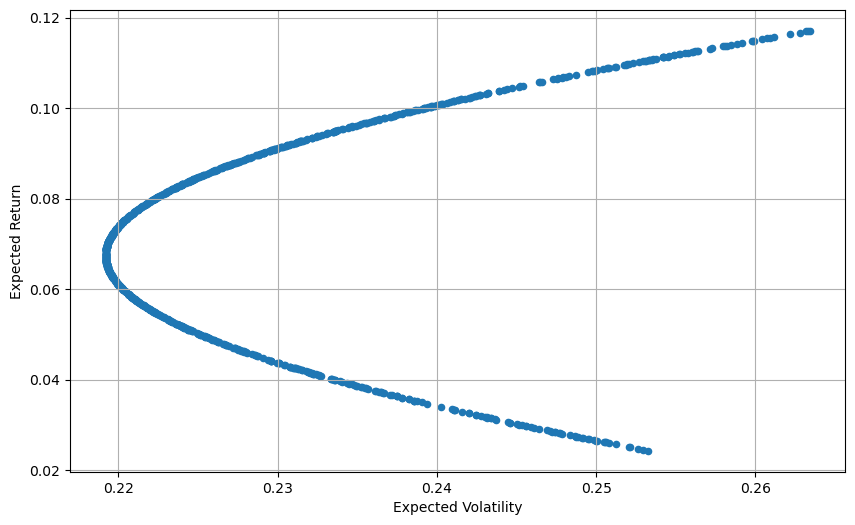

In [113]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.grid()

## モンテカルロ

In [128]:
log_returns = np.log(1 + df.pct_change())
log_returns.tail()

,7203.T,9020.T
Date,,
2022-12-01,-0.005987,-0.010683
2022-12-02,-0.013856,-0.002851
2022-12-05,-0.010199,-0.006902
2022-12-06,-0.003852,-0.004978
2022-12-07,0.003082,0.017444


In [151]:
code_list = pd.read_excel('data_j.xls')['コード']
company_name = pd.read_excel('data_j.xls')['銘柄名']



In [150]:
str(code[1]) + ".T"

'1305.T'

In [155]:
code_list[:4]

0    1301
1    1305
2    1306
3    1308
Name: コード, dtype: int64

In [158]:
df = pd.DataFrame()
i = 0
for code in code_list[:4]:
    adj_data = wb.DataReader(str(code)+'.T','yahoo')['Adj Close']
    df[company_name[i]] = adj_data
    i = i+1

In [167]:
# 上場している全社の過去5年分のデータをダウンロードする
df = pd.DataFrame()
i = 0
for code in code_list[:4]:
    stock_price_data = wb.DataReader(str(code)+'.T','yahoo')
    save_path = './save_file/{}.xlsx'.format(company_name[i])
    stock_price_data.to_excel(save_path)
    i = i+1

# クラウド上にデータを置いて、効率的フロンティアからモンテカルロシミュレーションを
# flaskで実現できるとよさそう

In [1]:
from pandas_datareader import data as wb
import pandas as pd
data = wb.DataReader("^N225", 'yahoo')
data.to_csv("N225.csv")